In [1]:
import pandas as pd
import numpy as np
import scipy
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split as split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, auc, roc_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from IPython.display import Image

%matplotlib inline


# Here we are trying to find out the percentage of positive and negative reviews. 
# Check the number of positive words and negative words under the Review Text.
# How likely you can find a customer recommending the brand given that he or she gave high ratings to the brand?


In [2]:
df= pd.read_csv("C:\\Users\\R K Ghosh\\Desktop\\New folder (2)\\DA\\Womens Clothing E-Commerce Reviews.csv")

In [3]:
df.head()  # importing a text file.

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [4]:
df2= df.drop(['Unnamed: 0','Clothing ID'],axis=1)
df2.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 9 columns):
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [6]:
df2.groupby(['Rating','Recommended IND'])['Recommended IND'].count()
# we can observe that the customer with the highest number of possibilities of recommending the brand to 
# others were found more to be giving 5 ratings for the service, followed by 4, 3, 2 and then 1.

Rating  Recommended IND
1       0                    826
        1                     16
2       0                   1471
        1                     94
3       0                   1682
        1                   1189
4       0                    168
        1                   4909
5       0                     25
        1                  13106
Name: Recommended IND, dtype: int64

In [7]:
df2.loc[(df2.Rating==5) & (df2['Recommended IND']==0)]['Review Text'].iloc[1]

"This top is one of my retailer faves! it is so comfortable and love the quality and design. i receive many compliments on this top. i usually wear an xs or s in retailer tops and the xs was a little tight in the arms. the dressing room attendant suggested ordering a petite small so i wouldn't lose the shape. so glad i did. it fits perfect! i even ordered when it was on sale!! the gray color is perfect! its not too thick or thin."

In [8]:
df2['Title'].fillna('N', inplace = True) 
df2['Division Name'].fillna('N', inplace = True)
df2['Department Name'].fillna('N', inplace = True)
df2['Class Name'].fillna('N', inplace = True)
df2.tail()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,34,Great dress for many occasions,I was very happy to snag this dress at such a ...,5,1,0,General Petite,Dresses,Dresses
23482,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stre...",3,1,0,General Petite,Tops,Knits
23483,31,"Cute, but see through","This fit well, but the top was very see throug...",3,0,1,General Petite,Dresses,Dresses
23484,28,"Very cute dress, perfect for summer parties an...",I bought this dress for a wedding i have this ...,3,1,2,General,Dresses,Dresses
23485,52,Please make more like this one!,This dress in a lovely platinum is feminine an...,5,1,22,General Petite,Dresses,Dresses


In [9]:
df2['Review Text'].fillna('N', inplace = True) 
df2.head()

,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,N,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,N,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [10]:
# Here we are trying to get the review columns along side with the recommendations column to understand how many customers have recommended the brand.
text_df= df[['Title','Review Text','Recommended IND']]
text_df.head()

,Title,Review Text,Recommended IND
0,NaN,Absolutely wonderful - silky and sexy and comf...,1
1,NaN,Love this dress! it's sooo pretty. i happene...,1
2,Some major design flaws,I had such high hopes for this dress and reall...,0
3,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",1
4,Flattering shirt,This shirt is very flattering to all due to th...,1


In [11]:
# In order to merge both the columns for Title and Review Text, we are going to create a new column called Review.
text_df['Review'] = text_df['Title'] + '' + text_df['Review Text']
text_df = text_df.drop(['Title','Review Text'], axis=1)
text_df.head()

c:\users\r k ghosh\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Recommended IND,Review
0,1,NaN
1,1,NaN
2,0,Some major design flawsI had such high hopes f...
3,1,"My favorite buy!I love, love, love this jumpsu..."
4,1,Flattering shirtThis shirt is very flattering ...


In [12]:
text_df.Review.isna().sum()  # this shows that number of NA or missing comments within the dataset.

3811

In [13]:
# The next step is to drop the Na values from the NA column :
text_df.Review.isna().sum() 
text_df = text_df[~text_df.Review.isna()] 
text_df = text_df.rename(columns={"Recommended IND": "Recommended"})
print("My data's shape is:", text_df.shape)
text_df.head()


My data's shape is: (19675, 2)


,Recommended,Review
2,0,Some major design flawsI had such high hopes f...
3,1,"My favorite buy!I love, love, love this jumpsu..."
4,1,Flattering shirtThis shirt is very flattering ...
5,0,Not for the very petiteI love tracy reese dres...
6,1,Cagrcoal shimmer funI aded this in my basket a...


In [14]:
# Now that we removed the NA values, our target values will be the positive and negative reviews. 
# Therefore, we need to find out the number of positive and negative words 
# to find out the individual percentages for positive and negative reviews.
text_df['Recommended'].unique() # 0 refers to not recommend and 1 refers to recommending.

array([0, 1], dtype=int64)

In [15]:
# It shows an imbalanced target :
text_df['Recommended'].value_counts(normalize=True)
# As the distribution of the recommendations are found to be irregular, 
# therefore we can say that 81 % of the customers are recommending the brand 
# and 18 % of the customers are found not to be recommending the brand.
# Both the individual percentages constitutes to 100 % including the positive and negative reviews.

1    0.818297
0    0.181703
Name: Recommended, dtype: float64

In [16]:
# Adding Features :
# Here we are trying to count the length of the individual reviews by using the "len" function :
text_df['Review_length'] = text_df['Review'].apply(len)
text_df.head()

,Recommended,Review,Review_length
2,0,Some major design flawsI had such high hopes f...,523
3,1,"My favorite buy!I love, love, love this jumpsu...",140
4,1,Flattering shirtThis shirt is very flattering ...,208
5,0,Not for the very petiteI love tracy reese dres...,511
6,1,Cagrcoal shimmer funI aded this in my basket a...,516


In [17]:
text_df.describe()

,Recommended,Review_length
count,19675.000000,19675.000000
mean,0.818297,337.450267
std,0.385609,144.740126
min,0.000000,22.000000
25%,1.000000,216.000000
50%,1.000000,335.000000
75%,1.000000,495.000000
max,1.000000,556.000000


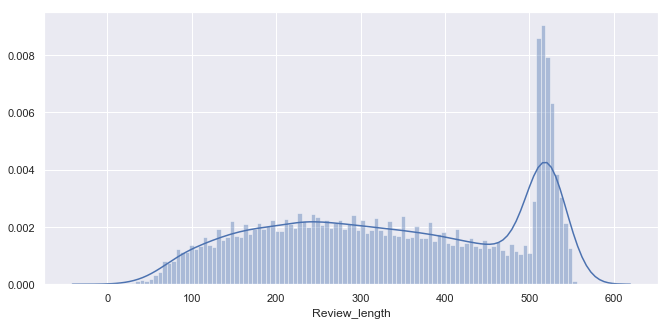

In [18]:
sns.set(rc={'figure.figsize':(11,5)})
sns.distplot(text_df['Review_length'] ,hist=True, bins=100)

In [19]:
# Now we have to define each of the criterias i.e., two kinds of recommendations ....0,1.

df_zero = text_df[text_df['Recommended']==0]
df_one = text_df[text_df['Recommended']==1]

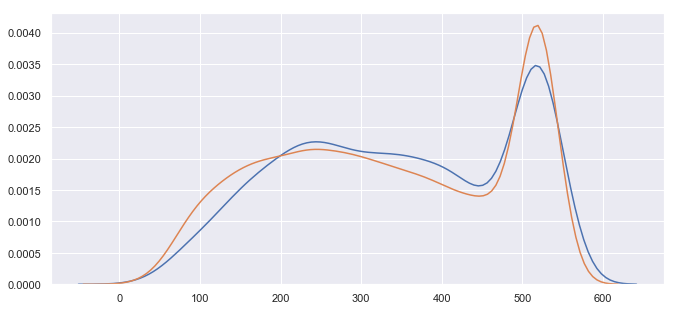

In [20]:
# We have to plot the graph for both the positive and non positive recommendations.
sns.distplot(df_zero[['Review_length']] , hist= False)
sns.distplot(df_one[['Review_length']] , hist= False)

In [21]:
# The next step here would be to count the exclamamtion marks which helps us understand that it is a positive review.
def count_exclamation_mark(string_variable):
    count = 0 
    for i,v in enumerate(string_variable):
        if v =='!' :
            count += 1
    return count

In [22]:
text_df['count_exc'] = text_df['Review'].apply(count_exclamation_mark)
text_df.head(6)

,Recommended,Review,Review_length,count_exc
2,0,Some major design flawsI had such high hopes f...,523,1
3,1,"My favorite buy!I love, love, love this jumpsu...",140,3
4,1,Flattering shirtThis shirt is very flattering ...,208,3
5,0,Not for the very petiteI love tracy reese dres...,511,0
6,1,Cagrcoal shimmer funI aded this in my basket a...,516,0
7,1,"Shimmer, surprisingly goes with lotsI ordered ...",518,0


In [77]:
text_df['count_exc'].describe()

count    19675.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: count_exc, dtype: float64

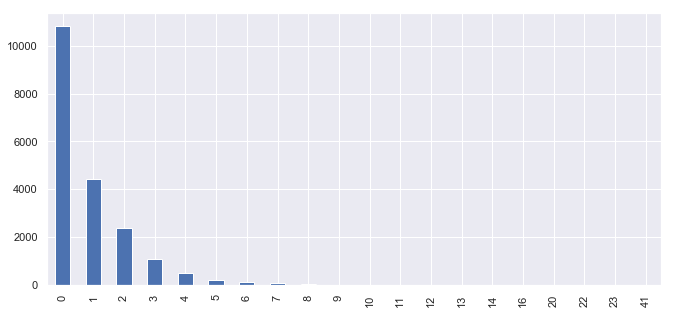

In [28]:
text_df['count_exc'].value_counts().sort_index().plot(kind='bar')

In [29]:
text_df[text_df['count_exc']== 1].index

Int64Index([    2,     9,    15,    19,    20,    22,    24,    29,    33,
               45,
            ...
            23459, 23460, 23465, 23467, 23471, 23473, 23478, 23479, 23481,
            23484],
           dtype='int64', length=4448)

In [30]:
text_df['Review'][2] # it is a negative review.

'Some major design flawsI had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c'

In [32]:
text_df['Review'][19] # it is a positive review.

"Stylish and comfortableI love the look and feel of this tulle dress. i was looking for something different, but not over the top for new year's eve. i'm small chested and the top of this dress is form fitting for a flattering look. once i steamed the tulle, it was perfect! i ordered an xsp. length was perfect too."

In [34]:
# On the other hand, you can observe the highly positive numbers by using the following codes :
text_df[text_df['count_exc']==41].index

Int64Index([3301], dtype='int64')

In [35]:
text_df['Review'][3301] # this shows it is an extremely positive feedback.

'Beautiful and unique.Love this top, just received it today.\r\nit is a very artistic interpretation for a casual top.\r\nthe blue is gorgeous!\r\nthe unique style of the peplm and the details on the front set this apart!\r\nruns a little shorter, but i feel the length enhances it;s beauty, and is appropriate for the overall design.\r\nlove !!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!\r\nordered my usual size and it fits perfectly.'

In [37]:
 # Dropping Punctuations
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [47]:
text_prep = text_df.copy()
text_prep.head()

,Recommended,Review,Review_length,count_exc
2,0,Some major design flawsI had such high hopes f...,523,1
3,1,"My favorite buy!I love, love, love this jumpsu...",140,3
4,1,Flattering shirtThis shirt is very flattering ...,208,3
5,0,Not for the very petiteI love tracy reese dres...,511,0
6,1,Cagrcoal shimmer funI aded this in my basket a...,516,0


In [45]:
def punctuation_removal(messy_str):
   clean_list = [char for char in messy_str if char not in string.punctuation]
   clean_str = ''.join(clean_list)
   return clean_str

In [46]:
text_prep['Review'] = text_prep['Review'].apply(punctuation_removal)
text_prep['Review'].head()

2    Some major design flawsI had such high hopes f...
3    My favorite buyI love love love this jumpsuit ...
4    Flattering shirtThis shirt is very flattering ...
5    Not for the very petiteI love tracy reese dres...
6    Cagrcoal shimmer funI aded this in my basket a...
Name: Review, dtype: object

In [48]:
# Mostly adjectives and verbs reflect the positiveness and negativeness of the reviews :
Image(url= "http://josecarilloforum.com/imgs/longnounphrase_schematic-1B.png", width=600, height=10)